In [18]:
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis

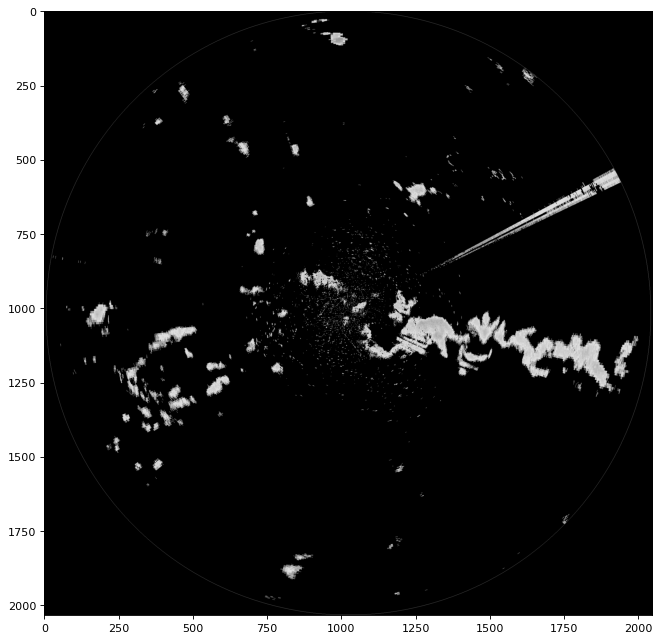

In [67]:
pic = cv2.imread("../../bkk_radar_images_dBZ_1/1592461954.png", 0)

plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(cv2.cvtColor(pic, cv2.COLOR_BGR2RGB))
plt.show()

In [46]:
pic.shape

(2034, 2048)

In [62]:
np.max(pic), 

222

In [68]:
mean = np.mean(pic)
var = np.var(pic, ddof=1)

print(mean, var)

7.182259018559488 1331.9805452232574


In [69]:
mahalanobis(pic[0,0], mean, 1/var)

0.19679412203137

In [70]:
mean + 3*np.sqrt(var)

116.6711849746091

In [71]:
filltered_pic = np.zeros(pic.shape)
cov_mat = 0 if var==0 else 1/var

for i in tqdm(range(pic.shape[0])):
    for j in range(pic.shape[1]):
        dis = mahalanobis(pic[i,j], mean, cov_mat)
        if dis > (mean + 3*np.sqrt(var)):
            filltered_pic[i,j] = 0
        else:
            filltered_pic[i,j] = pic[i,j]

100%|██████████| 2034/2034 [02:19<00:00, 14.63it/s]


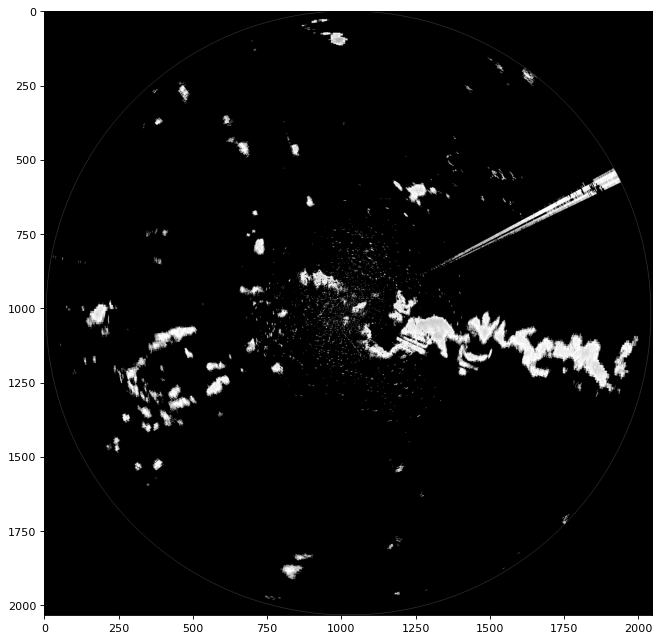

In [75]:
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(filltered_pic, cmap='gray')
plt.show()

In [ ]:
mahalanobis(pic[0,0], mean, var)